<a href="https://colab.research.google.com/github/sandeepangh782/ML-21CSC307P/blob/main/performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="color:white;background-color:Fuchsia;padding:3%;border-radius:150px 150px;font-size:1.5em;text-align:center"> <font color="White" size=+2.5 face="Lucida Calligraphy"><div style="align:center: justify">Evaluation Metrics in ML/AI for Classification </font></div>

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Introduction  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> This notebook aims to:  </h2>

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5F1666;
           font-size:22px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>Explain different types of Evaluation Metrics used in ML/AI</b>
        </p>

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:20px; color:Fuchsia"> The different types of Evaluation Metrics used in this project are:  </h1>

1.Confusion Matrix

2.Classification Report

3.Classification accuracy

4.Classification Error

5.Precision

6.Recall

7.True Positive Rate

8.True False Positive Rate

9.Specificity

10.Sensitivity

11.F1 Score

12.Support

13.ROC CUrve

14.Precision Recall Curve

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Library Importing  </h1>

In [10]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 77.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, precision_recall_curve
from sklearn.metrics import recall_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.precision", 3)

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
heart = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate/heart.csv')

heart.head().style.set_properties(**{'background-color': 'Olive',
                           'color': 'white',
                           'border-color': 'darkblack'})

Mounted at /content/gdrive


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [10]:
display(heart.shape)
display(heart.size)

(918, 12)

11016

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


In [14]:
heart.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [16]:
print(f'We have {heart.shape[0]} instances with the {heart.shape[1]-1} features and 1 output variable')

We have 918 instances with the 11 features and 1 output variable


In [17]:
pd.DataFrame(abs(heart.corr()['HeartDisease']))

,HeartDisease
Age,0.282
RestingBP,0.108
Cholesterol,0.233
FastingBS,0.267
MaxHR,0.400
Oldpeak,0.404
HeartDisease,1.000


<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Data train test split  </h1>

In [18]:
heart.head(1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [19]:
X = heart.drop('HeartDisease',axis=1)
y = heart['HeartDisease']

In [21]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [22]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_invariant=True)
X = encoder.fit_transform(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> Standardizing the data by using MinMaxScaler  </h1>

In [24]:
# scaling dataset with robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.531,0.0,0.333,0.75,0.346,0.0,0.0,0.437,0.0,0.295,0.0
1,0.531,1.0,0.000,0.70,0.548,0.0,0.5,0.563,0.0,0.295,0.0
2,0.551,0.0,0.667,0.66,0.626,0.0,0.0,0.507,1.0,0.432,0.5
3,0.306,1.0,0.333,0.75,0.450,0.0,0.0,0.810,0.0,0.295,0.0
4,0.449,0.0,0.667,0.70,0.410,0.0,0.5,0.563,1.0,0.864,0.5


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.592,1.0,1.000,0.65,0.546,0.0,0.0,0.268,0.0,0.409,0.5
1,0.306,0.0,0.667,0.60,0.310,0.0,0.0,0.423,1.0,0.409,0.5
2,0.245,0.0,0.667,0.60,0.826,1.0,0.0,0.648,1.0,0.409,0.5
3,0.306,0.0,0.667,0.60,0.314,0.0,1.0,0.423,1.0,0.580,0.5
4,0.571,0.0,0.333,0.85,0.000,0.0,1.0,0.444,1.0,0.580,0.5


<font color="Fuchsia"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Fuchsia"> Model Building  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> RandomForestClassifier  </h2>

In [25]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
# Logistic Regression
from sklearn.ensemble import RandomForestClassifier
Rm = RandomForestClassifier()
Rm.fit(X_train, y_train)
y_pred_Rm = Rm.predict(X_test)

Rm_train = round(Rm.score(X_train, y_train) * 100, 2)
Rm_accuracy = round(accuracy_score(y_pred_Rm, y_test) * 100, 2)
Rm_f1 = round(f1_score(y_pred_Rm, y_test) * 100, 2)

print("Training Accuracy    :",Rm_train,"%")
print("\033[1m---------------------------------\033[0m")
print("Model Accuracy Score :",Rm_accuracy,"%")

Training Accuracy    : 100.0 %
---------------------------------
Model Accuracy Score : 86.96 %


<font color="Olive"><h1 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:30px; color:Olive"> Classification metrices  </h1>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Lucida Calligraphy'; font-size:25px; color:Fuchsia"> Confusion Matrix </h2>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


*Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:*

> True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

> True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

> False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

> False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

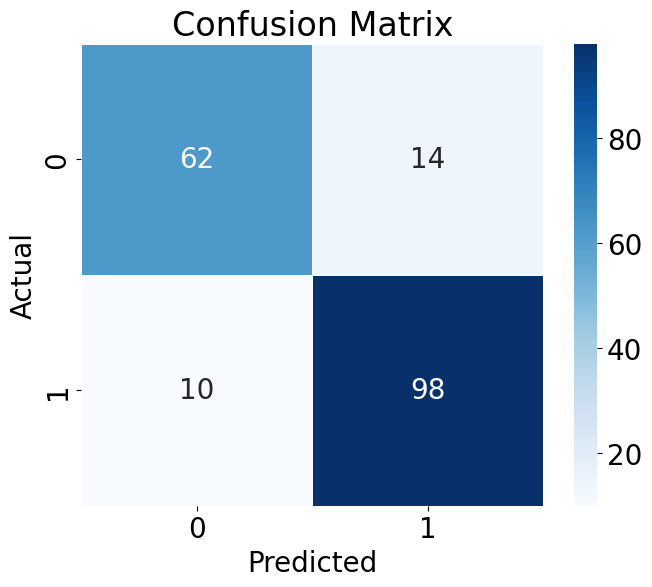

In [31]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained a model 'Rm' and have X_test and y_test
y_pred = Rm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Now you can use the confusion matrix 'cm' to analyze the model's performance.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_Rm)

print('Confusion matrix:\n\n', cm)
print("\033[1m-----------------------------\033[0m")
print('\nTrue Positives(TP) = ', cm[0,0])
print("\033[1m-----------------------------\033[0m")
print('\nTrue Negatives(TN) = ', cm[1,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Positives(FP) = ', cm[0,1])
print("\033[1m-----------------------------\033[0m")
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix:

 [[62 14]
 [10 98]]
-----------------------------

True Positives(TP) =  62
-----------------------------

True Negatives(TN) =  98
-----------------------------

False Positives(FP) =  14
-----------------------------

False Negatives(FN) =  10


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AC0000;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        The confusion matrix shows 59 + 98 = 157 correct predictions and 10 + 17 = 27 incorrect predictions.
    </p>
</div>

 **In this case, we have**

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Green;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        True Positives (Actual Positive:1 and Predict Positive:1) - 59
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Red;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        True Negatives (Actual Negative:0 and Predict Negative:0) - 98
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkOrange;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        False Positives (Actual Negative:0 but Predict Positive:1) - 17 (Type I error)
    </p>
</div>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:DarkSlateGray;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        False Negatives (Actual Positive:1 but Predict Negative:0) - 10 (Type II error)
    </p>
</div>

<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification Report  </h2>

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Fuchsia;
       font-size:140%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        Classification report is another way to evaluate the classification model performance. It displays the  precision, recall, f1 and support scores for the model.
    </p>
</div>

> If we want a more comprehensive summary of precision, recall, and f1-score, we can use the classification_report convenience function to compute all three at once, and print them in a nice format.

> The classification_report function produces one line per class (here, True and False) and reports precision, recall, and f-score with this class as the positive class.

> The last column next to the f-score provides the support of each class, which simply means the number of samples in this class according to the ground truth.

> The last row in the classification report shows a weighted (by the number of samples in the class) average of the numbers for each class.

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_Rm))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        76
           1       0.88      0.91      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification accuracy  </h2>

In [34]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [35]:
# print classification accuracy

classification_accuracy = ((TP + TN) / float(TP + TN + FP + FN)*100)

print('Classification accuracy : {0:0.2f}'.format(classification_accuracy),'%')

Classification accuracy : 86.96 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Classification error  </h2>

In [36]:
classification_error = ((FP + FN) / float(TP + TN + FP + FN)*100)

print('Classification error : {0:0.2f}'.format(classification_error),'%')

Classification error : 13.04 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Precision  </h2>

> **Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

> So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.</font>

> Mathematically, precision can be defined as the ratio of **TP to (TP + FP).**

In [37]:
# precision score

precision = (TP / float(TP + FP)*100)


print('Precision : {0:0.2f}'.format(precision),"%")

Precision : 81.58 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Recall  </h2>

> Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.

> **Recall** identifies the proportion of correctly predicted actual positives.</font>

> Mathematically, recall can be given as the ratio of **TP to (TP + FN).**</font>

In [38]:
# recall score

recall = (TP / float(TP + FN)*100)

print('Recall or Sensitivity : {0:0.2f}'.format(recall),"%")

Recall or Sensitivity : 86.11 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> True Positive Rate  </h2>

**True Positive Rate** is synonymous with **Recall**.

In [39]:
# true_positive_rate

true_positive_rate = (TP / float(TP + FN)*100)

print('True Positive Rate : {0:0.2f}'.format(true_positive_rate),"%")

True Positive Rate : 86.11 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> False Positive Rate  </h2>

In [40]:
# true_positive_rate

false_positive_rate = (FP / float(FP + TN)*100)

print('False Positive Rate : {0:0.2f}'.format(false_positive_rate),"%")

False Positive Rate : 12.50 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Specificity  </h2>

In [41]:
# Specificity

specificity = (TN / (TN + FP)*100)

print('Specificity : {0:0.2f}'.format(specificity),'%')

Specificity : 87.50 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> Sensitivity  </h2>

In [42]:
# Sensitivity

Sensitivity = (TP / (TP + FN)*100)

print('Specificity : {0:0.2f}'.format(Sensitivity),"%")

Specificity : 86.11 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia"> f1-score  </h2>

In [43]:
# f1 score

Rm_f1_score = round(f1_score(y_pred_Rm, y_test) * 100)
print('f1 Score : ',Rm_f1_score,"%")

f1 Score :  89 %


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia">ROC Curve </h2>

<center>
    <img src="http://web.cs.ucla.edu/~mtgarip/images/ROC_curve.png" alt="ROC Curve" width="80%">
</center

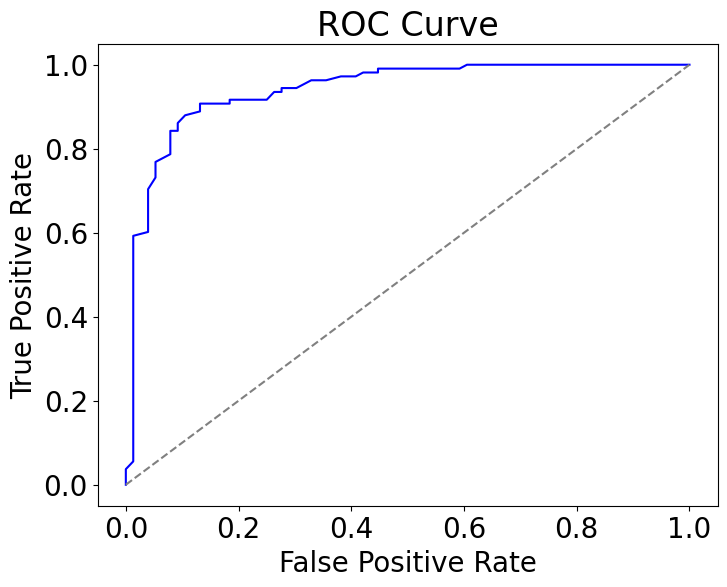

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained a model 'Rm' and have X_test and y_test
y_scores = Rm.predict_proba(X_test)[:, 1]  # Replace 1 with the index of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Now you can plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


<font color="Fuchsia"><h2 style="text-align: justify; font-family: 'Comic Sans MS'; font-size:25px; color:Fuchsia">Precision Recall Curve </h2>

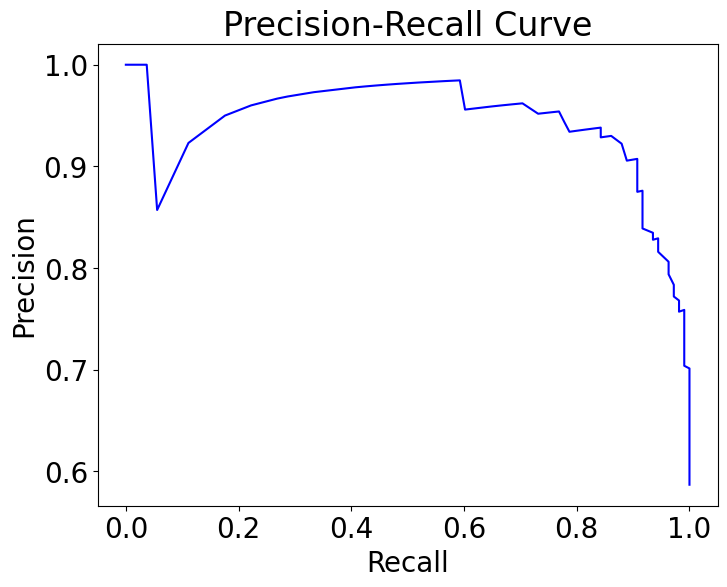

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have already trained a model 'Rm' and have X_test and y_test
y_scores = Rm.predict_proba(X_test)[:, 1]  # Replace 1 with the index of the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Now you can plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

